# In this simple example, we will feed the USGS site ID, date ranges, and the param code to retrieve a dataframe 

### The dataframe will contain an index array of datetimes and whatever parameter code we choose.

In [1]:
__author__ = 'rosskush'

# bring in everything you need
import os
import sys
import nwis_pull as nwis

# lets use a site that has discharge published on nwis

In [2]:
siteid = '08169000'
station_nm = 'Comal Rv at New Braunfels, TX'
param_code = '00060'

df = nwis.pull_data.realtime(siteid,start_date='2018-07-01',end_date='2018-07-11',param_code=param_code)

https://nwis.waterdata.usgs.gov/nwis/uv?cb_00060=on&format=rdb&site_no=08169000&period=&begin_date=2018-07-01&end_date=2018-07-11


Notice that a website is reteruned after calling the funtion. This is a huge advantage to NWIS as anyone could access any public data simply by manipulating the url to the user's whim. 

Click on the the url and it will take you to a rdb file located on NWIS

# Now lets look at the data we pulled

We can print the dataframe to check that we have the data

In [3]:
df.head(10)

,00060
datetime,
2018-07-01 00:00:00,198
2018-07-01 00:15:00,189
2018-07-01 00:30:00,201
2018-07-01 00:45:00,195
2018-07-01 01:00:00,195
2018-07-01 01:15:00,198
2018-07-01 01:30:00,198
2018-07-01 01:45:00,195
2018-07-01 02:00:00,192


<IPython.core.display.Javascript object>


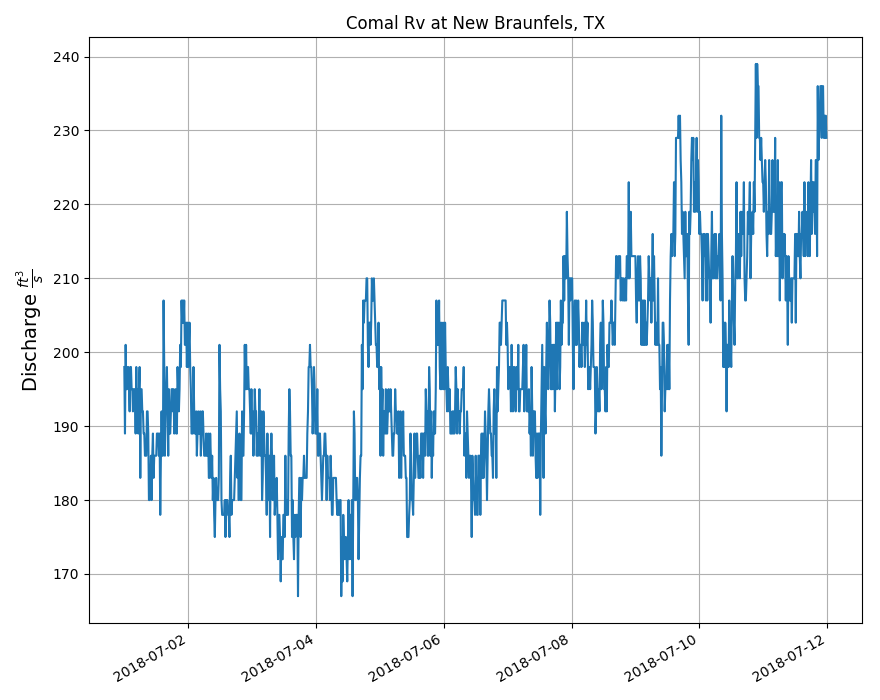

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots(figsize=(8.8,7))
ax.plot(df.index,df[param_code])
ax.set_ylabel('Discharge $\\frac{ft^3}{s}$',fontsize = 14)
ax.grid()
plt.title(station_nm)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

# That looks a little chuncky
This is because the USGS has certain guidlines they follow about rounding their reported numbers, but no worries, for our purposes lets resample our 15 minute data to hourly

In [5]:
df_hr = df.resample('h').mean() # this resamples a datetime index to hourly and averages each value within the hour 
df_hr.head(10)

,00060
datetime,
2018-07-01 00:00:00,195.75
2018-07-01 01:00:00,196.50
2018-07-01 02:00:00,195.75
2018-07-01 03:00:00,194.25
2018-07-01 04:00:00,193.50
2018-07-01 05:00:00,194.25
2018-07-01 06:00:00,191.25
2018-07-01 07:00:00,189.00
2018-07-01 08:00:00,189.00


<IPython.core.display.Javascript object>


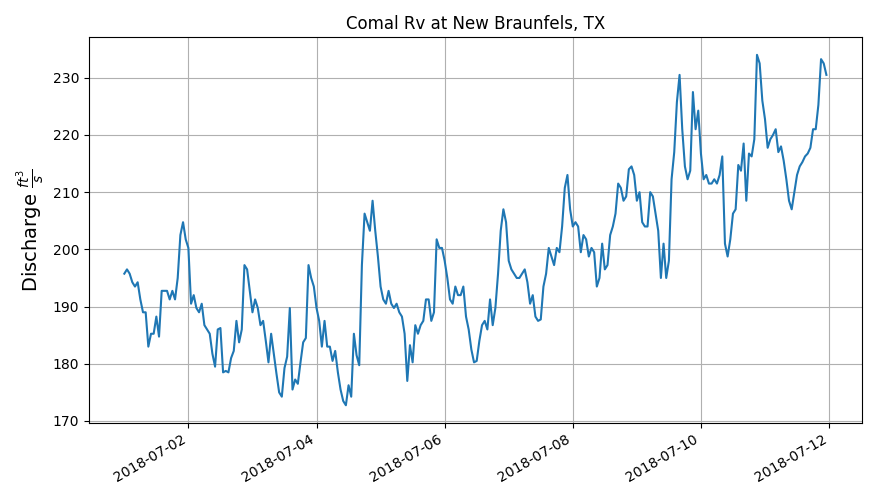

In [6]:
fig, ax = plt.subplots(figsize=(8.8,5))
ax.plot(df_hr.index,df_hr[param_code])
ax.set_ylabel('Discharge $\\frac{ft^3}{s}$',fontsize = 14)
ax.grid()
plt.title(station_nm)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

# Much nicer!! 
Now for fun lets see what it looks like daily.

In [7]:
df_day = df.resample('d').mean() # this resamples a datetime index to hourly and averages each value within the hour 
df_day.head(10)

,00060
datetime,
2018-07-01,192.635417
2018-07-02,186.927083
2018-07-03,184.031250
2018-07-04,187.322917
2018-07-05,189.552083
2018-07-06,191.083333
2018-07-07,197.197917
2018-07-08,203.854167
2018-07-09,211.197917


<IPython.core.display.Javascript object>


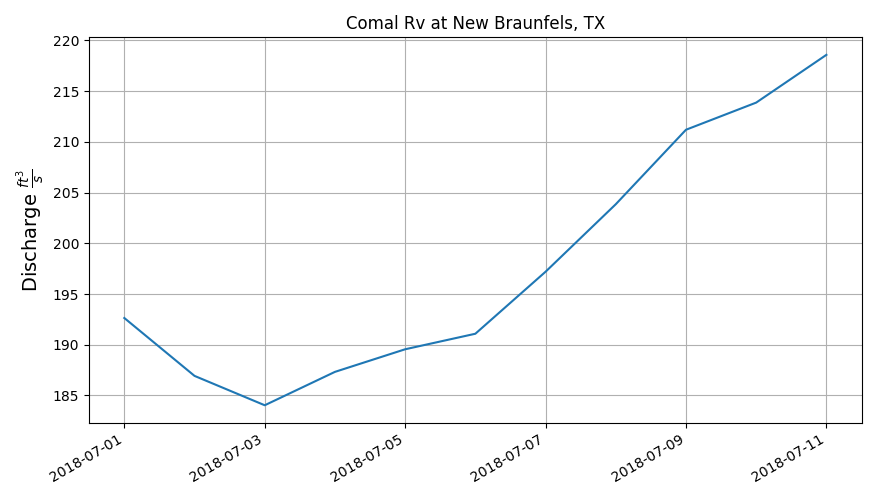

In [8]:
fig, ax = plt.subplots(figsize=(8.8,5))
ax.plot(df_day.index,df_day[param_code])
ax.set_ylabel('Discharge $\\frac{ft^3}{s}$',fontsize = 14)
ax.grid()
plt.title(station_nm)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()